In [ ]:
# import
from sympy import ln, symbols, cos
from tabulate import tabulate

x = symbols('x', real=True)
fungsi = ln(1+x).series
taylor_series = fungsi.series(x, 0, 5).removeO() # Buat taylor series 5 suku pertama SUBTITUSI SUKU N, X0 = 0 Maclaurin series

approx = taylor_series.subs(x, 0.2) # SUBTITUSI NILAI X KE TAYLOR SERIES
exact = fungsi.subs(x, 0.2) # SUBTITUSI NILAI X KE FUNGSI
galat_absolut =  abs(exact - approx)
galat_relative = galat_absolut / abs(exact)

# PRINT 
print("DERET TAYLOR :", taylor_series)
print("NILAI EXACT :", exact)
print("NILAI APPROX:", approx)
print("NILAI GALAT ABSOLUT :", galat_absolut)
print("NILAI GALAT RELATIF :", galat_relative)
print()


DERET TAYLOR : -x**4/4 + x**3/3 - x**2/2 + x
NILAI EXACT : 0.182321556793955
NILAI APPROX: 0.182266666666667
NILAI GALAT ABSOLUT : 5.48901272879321e-5
NILAI GALAT RELATIF : 0.000301062190632590



Root (Bisection): 2.7065279483795166
Root (Newton-Raphson): 2.706527954497935
Root (Secant): 2.706527954497937
Root (Regula Falsi): 2.7065279131342495


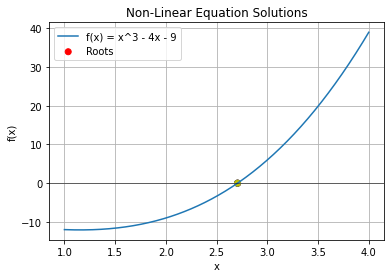

"\nExplanation:\n1. **Bisection Method** - A bracketing method that narrows down the interval containing the root.\n2. **Newton-Raphson Method** - Uses the function's derivative to make rapid converging estimates.\n3. **Secant Method** - Similar to Newton-Raphson but approximates the derivative using secants.\n4. **Regula Falsi Method** - A hybrid between Bisection and Secant, ensuring the root is bracketed.\n\nEach method has been implemented and compared for a sample function f(x) = x^3 - 4x - 9.\n"

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    """
    Bisection Method: A root-finding method that repeatedly divides an interval in half
    and selects the subinterval that contains the root.
    
    Parameters:
    f: Function for which the root is to be found
    a, b: Interval [a, b] where f(a) * f(b) < 0 (sign change)
    tol: Tolerance level for stopping condition
    max_iter: Maximum number of iterations
    """
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    for i in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c

def newton_raphson_method(f, df, x0, tol=1e-6, max_iter=100):
    """
    Newton-Raphson Method: Uses the function's derivative to iteratively approach a root.
    
    Parameters:
    f: Function for which the root is to be found
    df: Derivative of f
    x0: Initial guess for the root
    tol: Tolerance level for stopping condition
    max_iter: Maximum number of iterations
    """
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    """
    Secant Method: A root-finding algorithm that approximates the derivative by using
    secant lines instead of the actual derivative.
    
    Parameters:
    f: Function for which the root is to be found
    x0, x1: Initial two guesses
    tol: Tolerance level for stopping condition
    max_iter: Maximum number of iterations
    """
    for i in range(max_iter):
        x_new = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(x_new - x1) < tol:
            return x_new
        x0, x1 = x1, x_new
    return x1

def regula_falsi_method(f, a, b, tol=1e-6, max_iter=100):
    """
    Regula Falsi (False Position) Method: Similar to the secant method but always
    maintains a bracketing interval.
    
    Parameters:
    f: Function for which the root is to be found
    a, b: Interval [a, b] where f(a) * f(b) < 0 (sign change)
    tol: Tolerance level for stopping condition
    max_iter: Maximum number of iterations
    """
    if f(a) * f(b) >= 0:
        print("Regula Falsi method fails.")
        return None
    for i in range(max_iter):
        c = b - f(b) * (b - a) / (f(b) - f(a))
        if abs(f(c)) < tol:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c

# Example function and its derivative
f = lambda x: x**3 - 4*x - 9  # Example function: x^3 - 4x - 9
df = lambda x: 3*x**2 - 4     # Derivative of the function

a, b = 2, 3  # Interval for methods that require bracketing
x0, x1 = 2, 3  # Initial guesses for iterative methods

# Finding roots using different methods
root_bisection = bisection_method(f, a, b)
root_newton = newton_raphson_method(f, df, x0)
root_secant = secant_method(f, x0, x1)
root_regula = regula_falsi_method(f, a, b)

# Printing results
print("Root (Bisection):", root_bisection)
print("Root (Newton-Raphson):", root_newton)
print("Root (Secant):", root_secant)
print("Root (Regula Falsi):", root_regula)

# Plotting the function
d = np.linspace(1, 4, 400)
y = f(d)
plt.plot(d, y, label='f(x) = x^3 - 4x - 9')
plt.axhline(0, color='black', linewidth=0.5)
plt.scatter([root_bisection, root_newton, root_secant, root_regula], [0, 0, 0, 0], color=['r', 'g', 'b', 'y'], label='Roots')
plt.legend()
plt.title("Non-Linear Equation Solutions")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

"""
Explanation:
1. **Bisection Method** - A bracketing method that narrows down the interval containing the root.
2. **Newton-Raphson Method** - Uses the function's derivative to make rapid converging estimates.
3. **Secant Method** - Similar to Newton-Raphson but approximates the derivative using secants.
4. **Regula Falsi Method** - A hybrid between Bisection and Secant, ensuring the root is bracketed.

Each method has been implemented and compared for a sample function f(x) = x^3 - 4x - 9.
"""
